# Matplotlib
## Introduction
by F. Acero SAp - LEPCHE

- matplotlib (mpl) is a python plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

- mpl tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code. 

- For simple plotting the pyplot interface provides a MATLAB-like interface, particularly when combined with IPython.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).



Matplotlib is growing as a fast competitor of other plotting programs (from Google trends):

<img src="files/matplotlib-trends.png" width=600>



Who uses idl or python to plot somehting ?
<img src="files/plot-idl-map.png" width=600>
Those who can affor the license ;-)

<img src="files/plot-python-map.png" width=600>






## Let's dive in !





In [13]:
import matplotlib.pyplot as plt  #Loading only the library we'll need. 
import numpy as np
%matplotlib inline

In [14]:
x=[1, 2, 3, 4, 5, 6]
y=x*2
print 'length(x) = ', len(x),'  ;   length(y)=',len(y)
print x,y


length(x) =  6   ;   length(y)= 12
[1, 2, 3, 4, 5, 6] [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]


Quick plotting in a simple way :

[1 2 3 4 5 6] [ 1  4  9 16 25 36]


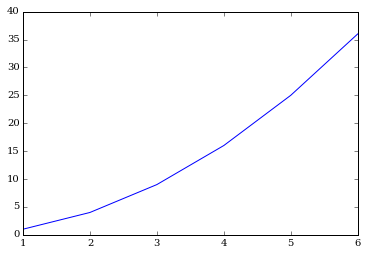

ls: cannot access *pdf: No such file or directory


In [15]:
# Turning on inline plots -- just for use in ipython notebooks.
# Comment the line below to have plots in a separate window (e.g. X11)
#%matplotlib inline

x=np.array( [1, 2, 3, 4, 5, 6] )
y=x**2
print x,y

plt.plot(x,y)
#plt.plot(x,y,color='red',marker='o')
#plt.plot(x,y,color='red',marker='$\odot$',markersize=15)  # can be any Latex symbol or just text in $$
#plt.scatter(x,y)

#plt.savefig('simple-plot.pdf') # also works with .ps, .png, .jpg, etc
plt.show()

%ls *pdf

List of marker available : http://matplotlib.org/api/markers_api.html

Very simple to add legend to the plot :

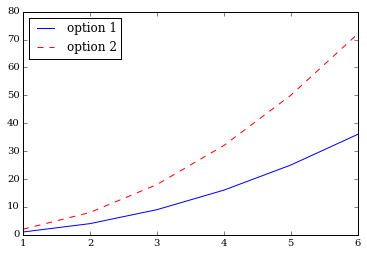

In [16]:
# Labels in legend can be added directly in the plot function.

plt.plot(x,y,label='option 1') 
plt.plot(x,y*2,'r--',label='option 2')
plt.legend(loc='upper left')  #,fancybox=True, fontsize=15)


# For more figure control:  scripted vs object oriented way

###Scripted way (the one seen above).

Matplotlib provides two flavors of interface. The scripted interface, designed to feel like Matlab. To enable this, matplotlib maintains a pointer to the current figure, current axis, etc. and directs top-level commands to those places:

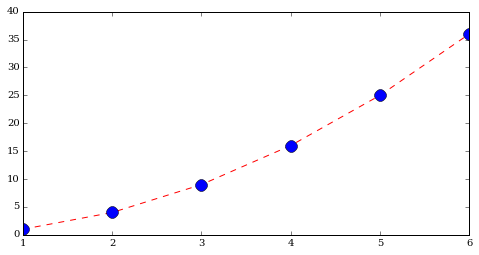

In [17]:
fig = plt.figure(figsize=(8,4)) 
# All plotting is done through the Figure object,  the "canvas" of your plot.

plt.plot(x,y,color='red',marker='o',linestyle='dashed',markerfacecolor='blue', markersize=12)
# passing all the details to the plot function

plt.show()

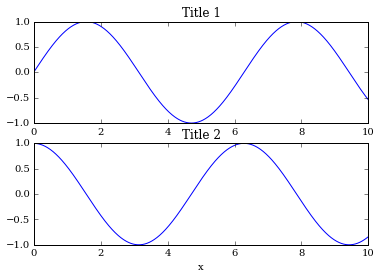

In [18]:
# create a double figure using the matlab-like interface
x = np.linspace(0, 10, 1000)

#plt.subplot(nrows, ncols, current_plot_number)  Usage of subplot function
plt.subplot(2, 1, 1)  # 2x1 grid, first plot
plt.plot(x, np.sin(x))
plt.title('Title 1')

plt.subplot(2, 1, 2)  # 2x1 grid, second plot
plt.plot(x, np.cos(x))
plt.title('Title 2')  # Location of title depends on where it is called in the code
plt.xlabel('x')

plt.show()

##Object oriented
In the object-oriented interface, we expliticly pass around references to the plot elements we want to work with:

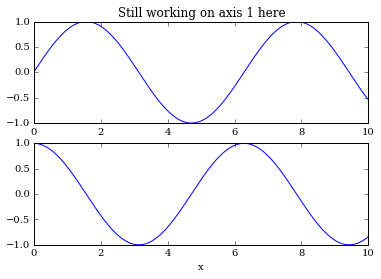

WTF is this ax1 object:


matplotlib.axes._subplots.AxesSubplot

In [19]:
# create the same figure using the object-oriented interface
fig = plt.figure()

#ax1 is the Axes object (frame) not a axis 1 and axis 2 

ax1 = fig.add_subplot(2, 1, 1)  # here fig is really used in an object oriented way
ax1.plot(x, np.sin(x))
ax1.set_title("This title will not be shown")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x, np.cos(x))
ax2.set_xlabel('x')
ax1.set_title("Still working on axis 1 here")


plt.show()
print 'WTF is this ax1 object:'
type(ax1)

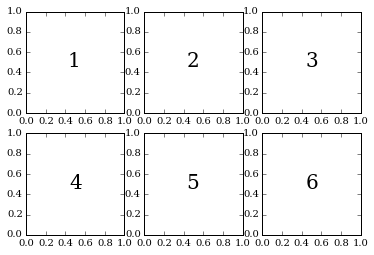

In [20]:
fig = plt.figure()
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) # return one by one the ith Axes object
    ax.text(0.45, 0.45, str(i), fontsize=20)


You can also work with an array of axes:

<type 'numpy.ndarray'>    => Now ax is an array of axes objects
<class 'matplotlib.axes._subplots.AxesSubplot'>


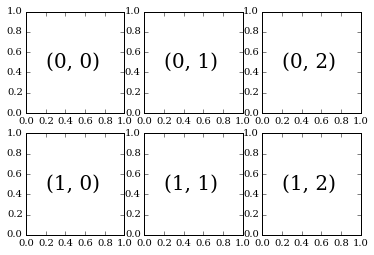

In [21]:
fig, ax = plt.subplots(2, 3) # return the entire array of Axes object
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.2, 0.45, str((i, j)), fontsize=20)
        
print type(ax), '   => Now ax is an array of axes objects'
print type(ax[0,0])

###Some things are easier to do/handle in the object oriented way :
like shared axis:

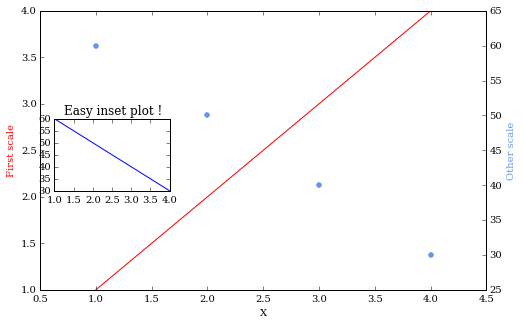

In [22]:

color1='red'
color2='cornflowerblue' # funny colors like  chartreuse, mintcream, cornsilk, seashell, peachpuff, lemonchiffon

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.plot([1, 2, 3, 4], [1, 2, 3, 4],color=color1)
ax1.set_xlabel('X')
ax1.set_ylabel('First scale',color=color1)

ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 50, 40, 30],color=color2)
ax2.set_ylabel('Other scale',color=color2)

ax_inset=fig.add_axes([0.15,0.4,0.2,0.2])#[left, bottom, width,height] in fraction of figure units (not data)
# It is that easy to create an inset !

ax_inset.plot([1, 2, 3, 4], [60, 50, 40, 30])
ax_inset.set_title('Easy inset plot !')

plt.show()




About named colors. Here is the full list:

In [23]:
import matplotlib
for name in matplotlib.colors.cnames.iteritems():
    print name[0]

indigo
gold
hotpink
firebrick
indianred
sage
yellow
mistyrose
darkolivegreen
olive
darkseagreen
pink
tomato
lightcoral
orangered
navajowhite
lime
palegreen
darkslategrey
greenyellow
burlywood
seashell
mediumspringgreen
fuchsia
papayawhip
blanchedalmond
chartreuse
dimgray
black
peachpuff
springgreen
aquamarine
white
orange
lightsalmon
darkslategray
brown
ivory
dodgerblue
peru
darkgrey
lawngreen
chocolate
crimson
forestgreen
slateblue
lightseagreen
cyan
mintcream
silver
antiquewhite
mediumorchid
skyblue
gray
darkturquoise
goldenrod
darkgreen
floralwhite
darkviolet
darkgray
moccasin
saddlebrown
grey
darkslateblue
lightskyblue
lightpink
mediumvioletred
slategrey
red
deeppink
limegreen
darkmagenta
palegoldenrod
plum
turquoise
lightgrey
lightgoldenrodyellow
darkgoldenrod
lavender
maroon
yellowgreen
sandybrown
thistle
violet
navy
magenta
dimgrey
tan
rosybrown
olivedrab
blue
lightblue
ghostwhite
honeydew
cornflowerblue
linen
darkblue
powderblue
seagreen
darkkhaki
snow
sienna
mediumblue
royalbl

##Why use one interface vs another?

These two interfaces are convenient for different circumstances. I find that for doing quick, simple plots, the scripted interface is often easiest. On the other hand, when I want more sophisticated plots, the object-oriented interface is simpler and more powerful. 





Note that most command of ax.[command] also exist with plt.[command] 
Plotting functions are the same:

plt.plot   =>   ax.plot


but plot modifiers use set_[command]  (a bit confusing I admit ...)

plt.xlabel  => ax.set_xlabel


But don't worry use the Tab function in the notebook to get a list of possible functions.

In [24]:
ax2.xl
ax2.set_xla

AttributeError: 'AxesSubplot' object has no attribute 'xl'

# pyplot modules has many other functions:
Here are a few exemples:

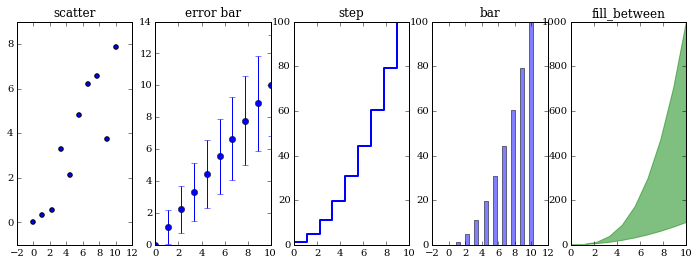

In [25]:
xx=np.linspace(0,10,num=10)

fig, ax = plt.subplots(1, 5, figsize=(12,4))

ax[0].scatter(xx, xx*np.random.random(len(xx)))
ax[0].set_title("scatter")

ax[1].errorbar(xx, xx, yerr=np.sqrt(xx), fmt='o' )
ax[1].set_title("error bar")

ax[2].step(xx, xx**2, lw=2)
ax[2].set_title("step")

ax[3].bar(xx, xx**2, align="center", width=0.5, alpha=0.5)
ax[3].set_title("bar")

ax[4].fill_between(xx, xx**2, xx**3, color="green", alpha=0.5);
ax[4].set_title("fill_between");

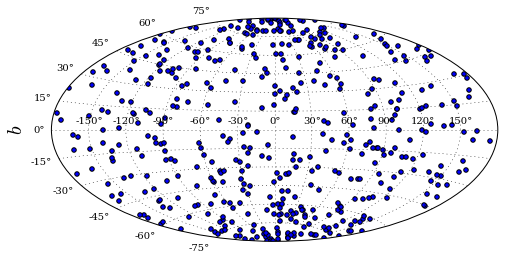

In [26]:
N=500
l=np.random.uniform(low=-180, high=180, size=N) 
b=np.random.uniform(low=-90, high=90, size=N)   

fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
ax = fig.add_subplot(111   , projection="aitoff") # projection='hammer', ''

ax.scatter(np.radians(l), np.radians(b) ) # Angles need to be in radians.
ax.set_ylabel('$b$',fontsize=20)     # Latex symbols can be used in plots !
ax.grid(True)
plt.show()



# List of pyplot modules
The pyplot module is where everything in matplotlib comes together. It is the launching point for:
- (1) preparing your figures
- (2) making plots
- (3) doing any modifications and decorations you want. 

It all comes together here. Let us take a look at those three catagories of pyplot functions.

## Plotting Preparation

Function          | Description                                                                                
:-----------------|:----------------------------------------------------------
`autoscale`       | Autoscale the axis view to the data (toggle).
`axes`            | Add an axes to the figure.                                                                 
`axis`            | Convenience method to get or set axis properties.
`cla`             | Clear the current axes.                                                                    
`clf`             | Clear the current figure.                                                                  
`clim`            | Set the color limits of the current image.                                                 
`delaxes`         | Remove an axes from the current figure.                                                    
`locator_params`  | Control behavior of tick locators.                                                         
`margins`         | Set or retrieve autoscaling margins.
`figure`          | Creates a new figure.
`gca`             | Return the current axis instance.                                                          
`gcf`             | Return a reference to the current figure.                                                  
`gci`             | Get the current colorable artist.                                                          
`hold`            | Set the hold state.                                                                        
`ioff`            | Turn interactive mode off.                                                                 
`ion`             | Turn interactive mode on.                                                                  
`ishold`          | Return the hold status of the current axes.                                                
`isinteractive`   | Return status of interactive mode.                                                         
`rc`              | Set the current rc params.                                                                 
`rc_context`      | Return a context manager for managing rc settings.                                         
`rcdefaults`      | Restore the default rc params.                                                             
`savefig`         | Save the current figure.                                                                   
`sca`             | Set the current Axes instance.                                                     
`sci`             | Set the current image.                                                                     
`set_cmap`        | Set the default colormap
`setp`            | Set a property on an artist object
`show`            | Display a figure
`subplot`         | Return a subplot axes positioned by the given grid definition.                             
`subplot2grid`    | Create a subplot in a grid.                                                                
`subplot_tool`    | Launch a subplot tool window for a figure.                                                 
`subplots`        | Create a figure with a set of subplots already made.                                       
`subplots_adjust` | Tune the subplot layout.                                                                   
`switch_backend`  | Switch the default backend.                                                                
`tick_params`     | Change the appearance of ticks and tick labels.                                            
`ticklabel_format`| Change the ScalarFormatter used by default for linear axes.           
`tight_layout`    | Automatically adjust subplot parameters to give specified padding.                         
`xkcd`            | Turns on [XKCD](http://xkcd.com/) sketch-style drawing mode.                             
`xlabel`          | Set the *x* axis label of the current axis.                                                
`xlim`            | Get or set the *x* limits of the current axes.                                             
`xscale`          | Set the scaling of the *x*-axis.                                                           
`xticks`          | Get or set the *x*-limits of the current tick locations and labels.                        
`ylabel`          | Set the *y* axis label of the current axis.                                                
`ylim`            | Get or set the *y*-limits of the current axes.                                             
`yscale`          | Set the scaling of the *y*-axis.                                                           
`yticks`          | Get or set the *y*-limits of the current tick locations and labels.                        

## Plotting Functions

Function          | Description
:-----------------|:--------------------------------------------
`acorr`           | Plot the autocorrelation of *x*
`bar`             | Make a bar plot
`barbs`           | Plot a 2-D field of barbs
`barh`            | Make a horizontal bar plot
`boxplot`         | Make a box and whisker plot
`broken_barh`     | Plot horizontal bars
`cohere`          | Plot the coherence between *x* and *y*
`contour`         | Plot contours
`contourf`        | Plot filled contours
`csd`             | Plot cross-spectral density
`errorbar`        | Plot an errorbar graph
`eventplot`       | Plot identical parallel lines at specific positions
`fill`            | Plot filled polygons
`fill_between`    | Make filled polygons between two curves
`fill_betweenx`   | Make filled polygons between two horizontal curves
`hexbin`          | Make a hexagonal binning plot
`hist`            | Plot a histogram
`hist2d`          | Make a 2D histogram plot
`imshow`          | Display an image on the axes
`loglog`          | Make a plot with log scaling on both the *x* and *y* axis
`matshow`         | Display an array as a matrix in a new figure window
`pcolor`          | Create a pseudocolor plot of a 2-D array
`pcolormesh`      | Plot a quadrilateral mesh
`pie`             | Plot a pie chart
`plot`            | Plot lines and/or markers
`plot_date`       | Plot with data with dates
`polar`           | Make a polar plot
`psd`             | Plot the power spectral density
`quiver`          | Plot a 2-D field of arrows
`scatter`         | Make a scatter plot of x vs y
`semilogx`        | Make a plot with log scaling on the *x* axis 
`semilogy`        | Make a plot with log scaling on the *y* axis
`specgram`        | Plot a spectrogram
`spy`             | Plot the sparsity pattern on a 2-D array
`stackplot`       | Draws a stacked area plot
`stem`            | Create a stem plot
`step`            | Make a step plot
`streamplot`      | Draws streamlines of a vector flow
`tricontour`      | Draw contours on an unstructured triangular grid
`tricontourf`     | Draw filled contours on an unstructured triangular grid
`tripcolor`       | Create a pseudocolor plot of an unstructured triangular grid
`triplot`         | Draw a unstructured triangular grid as lines and/or markers
`xcorr`           | Plot the cross-correlation between *x* and *y*

## Plot modifiers

Function          | Description                                                                                
:-----------------|:---------------------------------------------------------------------
`annotate`        | Create an annotation: a piece of text referring to a data point
`arrow`           | Add an arrow to the axes
`axhline`         | Add a horizontal line across the axis
`axhspan`         | Add a horizontal span (rectangle) across the axis
`axvline`         | Add a vertical line across the axes
`axvspan`         | Add a vertical span (rectangle) across the axes
`box`             | Turn the axes box on or off
`clabel`          | Label a contour plot
`colorbar`        | Add a colorbar to a plot
`grid`            | Turn the axes grids on or off
`hlines`          | Plot horizontal lines
`legend`          | Place a legend on the current axes
`minorticks_off`  | Remove minor ticks from the current plot
`minorticks_on`   | Display minor ticks on the current plot
`quiverkey`       | Add a key to a quiver plot
`rgrids`          | Get or set the radial gridlines on a polar plot
`suptitle`        | Add a centered title to the figure
`table`           | Add a table to the current axes
`text`            | Add text to the axes
`title`           | Set a title of the current axes
`vlines`          | Plot vertical lines
`xlabel`          | Set the *x* axis label of the current axis
`ylabel`          | Set the *y* axis label of the current axis

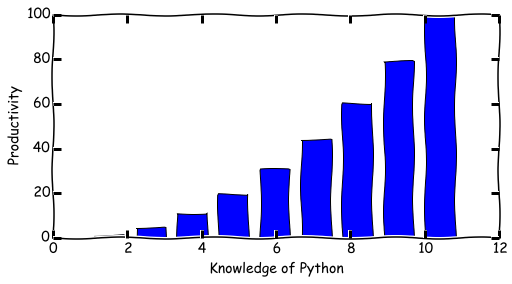

In [27]:
with plt.xkcd():  # plots in the style of xkcd comics
    x = np.linspace(0, 10, 10)
    fig = plt.figure(figsize=(8,4))
    plt.bar(x, x**2)
    plt.xlabel('Knowledge of Python')
    plt.ylabel('Productivity')
    plt.show()


## Showing 2D images, contours, and colorbars :

x shape =  (20,)
X shape =  (20, 20)
Z shape =  (20, 20)


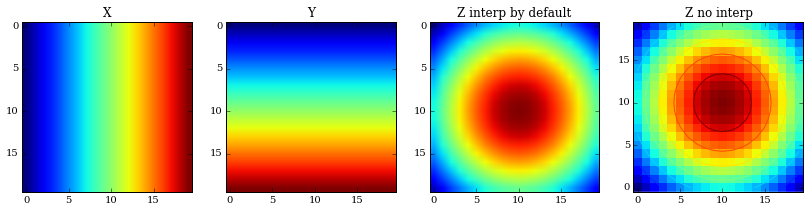

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


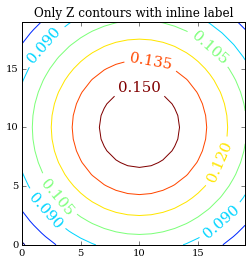

In [28]:
import matplotlib.mlab as mlab

delta = 0.1
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
print 'x shape = ', x.shape
X, Y = np.meshgrid(x, y)           # Python is case sensitive 
print 'X shape = ', X.shape
Z = mlab.bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0)
print 'Z shape = ', Z.shape


fig, ax = plt.subplots(1, 4, figsize=(14,4))

ax[0].imshow(X)
ax[0].set_title('X')
ax[1].imshow(Y)
ax[1].set_title('Y')
ax[2].imshow(Z)
ax[2].set_title('Z interp by default')
ax[3].imshow(Z,interpolation='none',origin='lower')
ax[3].set_title('Z no interp')
ax[3].contour(Z)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(4,4))
CS = ax.contour(Z)
ax.clabel(CS, inline=1, fontsize=15,rotation='horizontal')
ax.set_title('Only Z contours with inline label')
plt.show()

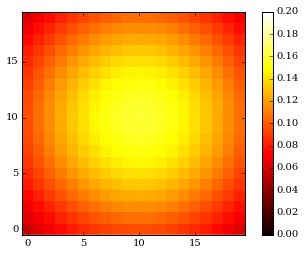

In [29]:
fig=plt.figure()
plt.imshow(Z,interpolation='none',origin='lower',vmin=0,vmax=0.2,cmap='hot')
plt.colorbar()  # Using the imshow image object to draw the colorbar 
plt.show()

Lots of included colormaps that you can call by their name (not some random number like in IDL =>  "loadct, 5" :-) 

![image](files/cmap-list.png)

#Super easy interactive plots !!

Plots are updated on the fly. 

<function __main__.complex_plot>

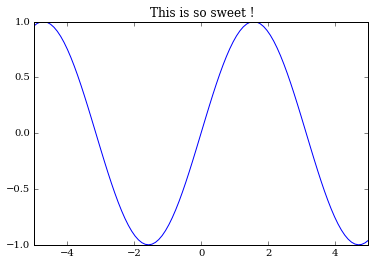

In [30]:
from IPython.html.widgets import interact

def complex_plot(funct='np.sin(x)', 
                 title='This is so sweet !',
                 color='blue',
                 dashed=False,
                 points=False,
                 myscale=5.):
    
    x = np.linspace(-myscale, +myscale, 100)
    fx = eval(funct) # get the function of given name in np namespace
    s = '--' if dashed else '-'   
    plt.plot(x, fx, s,color=color)
    if points: plt.plot(x,fx,'o',color=color)
    plt.xlim(-myscale, +myscale)
    plt.title(title)
    
interact(complex_plot)
#interact( complex_plot, funct=('np.sin(x)', 'np.cos(x)', 'np.tan(x)','x**2' ) )

#Matplotib Gallery is a great source of example for your plots
If you want to make a plot, the code is probably already available here. So copy/load it and adapt it to your data !




In [31]:
from IPython.display import HTML
HTML('<iframe src=http://matplotlib.org/gallery.html width=600 height=350></iframe>')

#Loading Matplotlib demos with %load
IPython's %load magic can be used to load any Matplotlib demo by its URL:

In [32]:
#Try this to change the plotting style:
#import pandas as pd
#pd.set_option('display.mpl_style', 'default')

In [ ]:
%load http://matplotlib.org/mpl_examples/pylab_examples/scatter_hist.py

##Advanced examples. Creating animations:

Go to your console. Look for the Bootcamp 'files' directory and run the following command:
```bash
ipython -i  --matplotlib=qt particle_box.py  
```
Or simply run the command below from the notebook:

In [ ]:
!ipython -i  --matplotlib=qt files/particle_box.py 

# Exercise 1:

Try repoducing the plot below that show the evolution of gas price in France (source INSEE), the fraction of tax and the ratio of sp95/gazole taxation.


<img src="files/Exercise-1-gaz-price.png" width=650>



In [ ]:
#Import your lib here
#Tip for reading dates import this:
import matplotlib.dates as mdates


# to load a file with a date column
date, gazht, spht, gaz, sp = np.loadtxt('files/essence.txt', delimiter=' ', 
                                        usecols=(0,1,2,5,6), unpack=True, 
                                        converters={0: mdates.strpdate2num('%d/%m/%Y')})


#Tip: to show date on X-axis with only the year
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# --------------
# Your job is now to code the part below:

#My cool plotting code
# ...


# END



#Exercise 2:



Try to code an interactive plot to explore a few of the gamma-ray source properties from the 3FGL
where different category of source are represented by different colors.
Don't need to set a list of colors, just do a loop of plt.plot and a different color will be chosen each time.

Something that will look like this:
<img src="files/3FGL-var-curv.png" width=500>



## Exercise 2:

Fill in the skeleton code below:

In [ ]:
# Load the interactive iPython widget here
# import the libs here

# Loading the variable from the 3FGL catalog (here an ASCII file).
# This should normally be done on the fits file with astropy fits reading function. But that's for tomorrow ;-)


name, srctype     =    np.loadtxt('files/3FGL-type-GLON-GLAT.txt', unpack=True,
                               usecols=[0,1], dtype='string')

GLON, GLAT, Signif_avg, Varindex, Signif_curv, Eflux = np.loadtxt('files/3FGL-type-GLON-GLAT.txt',
                                                                  unpack=True, usecols=[2,3,4,5,6,7])


#create a dictionary containing the variables that you may want to plot
data_dict={}


# the input of this function should be one of the key names in the dictionary
def myplot( xkey='enter_var1', ykey='enter_var2' ): 

#   Your job is to fill in this function
#   ...

#   Little tip. Plot the sources category by category
#   To do this get a unique list of existing source type and loop on it.
#   The np.where function will be handy

    srctype_list=np.unique(srctype)  # get a list of unique source type
    
    # By the way log axis are done that way:
    ax.set_xscale('log')
 
    plt.show()    
#   END    


# Create your interactive plot here:
# ...

# You can also easily create an interactive DropDown menu by specifying to interact the items of the dropdown menu
# like this: xkey=('GLON', 'GLAT','Varindex', 'Signif_curv', 'Eflux')

